<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/4_Measurements_PART_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install -U qiskit-aer pylatexenc matplotlib qiskit[visualization] > /dev/null

In [63]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
from qiskit import transpile
from IPython.display import display, Markdown

# INTRODUCCION:

---

Hasta este punto del solo hemos considerado un tipo específico de medición, llamada **medición estándar**.Estas mediciones estándar se hacen en la **base computacional**, que es el conjunto de vectores:

$$
\{ |x\rangle \}_{x=0}^{2^n - 1}
$$

Es decir, los estados base como $|00\rangle, |01\rangle, |10\rangle, |11\rangle$ o vectores como  $|0\rangle , |1\rangle , |2\rangle$ etc., dependiendo de cuántos qubits se tengan y por lo tanto este tipo de medición es equivalente a **medir cada qubit por separado**.

Por lo que ahora es necesario  **generalizar** esas mediciones. En  lugar de medir en la base computacional, vamos a permitir mediciones en **cualquier base ortonormal**, cualquier conjunto de vectores $\{ |v_0\rangle, |v_1\rangle, ..., |v_{2^n - 1}\rangle \}$ que sean ortogonales entre sí y tengan norma 1.

lo cual nos abrira la posibilidad de hacer cosas **más sofisticadas**, como **mediciones conjuntas sobre múltiples qubits** algo que es limitado si solo se mide qubit por qubit.

Debido que se hablaran de varios estados diferentes, formalmente se usaran dos maneras de representar dichos estados:

1. **Como números enteros**:

    Por ejemplo: $x = 0, 1, 2, ..., 2^n - 1$

2. **Como cadenas de bits**:
    
    Por ejemplo, si $n = 3$, entonces:

   * $x = 0$ ↔ $x_0x_1x_2 = 000$
   * $x = 5$ ↔ $x_0x_1x_2 = 101$



# Review sobre las mediciones:

---

Hemos visto que una medición de tipo **von Neumann** se define como una proyección del estado cuántico sobre una **base ortonormal completa** del espacio de Hilbert del sistema. Hasta ahora, hemos trabajado únicamente con mediciones en la **base computacional**, es decir, la base canónica formada por los estados $\{ |x\rangle \}_{x=0}^{2^n - 1}$, donde cada $|x\rangle$ es un producto tensorial de estados base individuales de cada qubit (por ejemplo, $|00\rangle, |01\rangle, \dots$).

Estas mediciones se denominan **mediciones estándar**, y en sistemas de múltiples qubits se corresponden con la ejecución de una medición independiente sobre cada qubit.

---

### Generalización de las medición en una  base ortonormal arbitraria:

La generalización consiste en permitir mediciones en cualquier base ortonormal del espacio de Hilbert $\mathcal{H}$ . Es decir, en lugar de restringirnos a los vectores $|x\rangle$, se permite cualquier conjunto $\{ |v_x\rangle \}_{x=0}^{2^n - 1}$ que cumpla:

1. **Ortonormalidad**:
   $\langle v_x | v_{x'} \rangle = \delta_{x,x'}$

2. **Completitud**:
   $\sum_{x=0}^{2^n - 1} |v_x\rangle \langle v_x| = I$

Esto abarca casos donde los vectores de la base pueden estar **entrelazados (entangled)**, lo cual permite modelar **mediciones conjuntas**, es decir, aquellas que no pueden descomponerse como mediciones independientes sobre qubits individuales.



El Proceso de medición en una base arbitraria en  un estado cuántico general $|\psi\rangle \in \mathcal{H}$ en la base ortonormal $\{ |v_x\rangle \}$ cumple las 2 caractaristicas indispensables:

1. **Regla de Born** (probabilidad de resultado):
   El resultado de la medición es el valor $x$ con probabilidad:

   $$
   P(x) = |\langle v_x | \psi \rangle|^2
   $$

2. **Colapso del estado**:
   Tras obtener el resultado $x$, el estado post-medición se convierte en:

   $$
   |\psi\rangle \longrightarrow |v_x\rangle
   $$

Este formalismo recupera el caso de las mediciones estándar cuando $|v_x\rangle = |x\rangle$ para todo $x$.

---

### Ejemplos ilustrativos:

Estos ejemplo ilustran la necesidad de escoger de forma correcta la base computacional y como afecta la medicion, consideremos dos casos:

* **Un solo qubit**:
  
Medir en la base de Hadamard $\{ |+\rangle, |-\rangle \}$ si un qubit en el estado  $|\psi\rangle = |+\rangle$, el resultado será determinista (se obtiene el estado 0 con probabilidad 1), mientras que en la base computacional el resultado sería aleatorio.

veamos:

$$
    |\psi\rangle = |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

La  medición en la base de diagonal (base de Hadamard) ${ |+\rangle, |-\rangle }$:

La base ortonormal es:

$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle), \quad |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$


Si el estado del sistema es $|\psi\rangle|+\rangle$, entonces por la regla de Born:

$$
\Pr[\text{medición} = +] = |\langle +|+\rangle|^2 = 1
$$


$$
\Pr[\text{medición} = -] = |\langle -|+\rangle|^2 = 0
$$

El estado post-medición es $|+\rangle$ con probabilidad 1, es decir el estado 0 con probablidad 1 en la base computacional diagomal.

Un caso distinto sucede si medimos en la base  $\{ |+\rangle, |-\rangle \}$ si el qubit esta en el estado $|\psi\rangle = |+\rangle$, entonces por la regla de Born:

$$
\Pr[\text{medición} = 1] = |\langle 1|+\rangle|^2 = |\langle1| (\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle))|^ 2 = | \frac{1}{\sqrt{2}} (\langle1|0\rangle + \langle1|1\rangle)| ^ 2 = |\frac{1}{\sqrt{2}}|^2  = \frac{1}{2}
$$

$$
\Pr[\text{medición} = 0] = |\langle 0|+\rangle|^2 = |\langle 0| (\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle))|^ 2 = | \frac{1}{\sqrt{2}} (\langle 0|0\rangle + \langle 0|1\rangle)| ^ 2 = |\frac{1}{\sqrt{2}}|^2  = \frac{1}{2}
$$

Entonces  podemos decir que los estados estan aletoriamente distribuidos con probabilida de 1/2 tanto en 0 como en 1 de la base ortonormal.

* **Dos qubits**:

Consideraremos la medición en la base de **Bell** $\{ |\Phi^+\rangle, |\Phi^-\rangle, |\Psi^+\rangle, |\Psi^-\rangle \}$, donde los estados estan  maximamente entrelazados. Si el sistema está en el estado $|\Phi^+\rangle$, entonces una medición en esta base devuelve siempre el índice asociado a $|\Phi^+\rangle$, y el sistema permanece inalterado.

Sea el estado de Bell:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

* La base de Bell** \${ |\Phi^+\rangle, |\Phi^-\rangle, |\Psi^+\rangle, |\Psi^-\rangle }\$, donde se puede escribir como:


$$
|\Phi^+\rangle =  \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$
$$
|\Phi^-\rangle =  \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)
$$
$$
|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)
$$
$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
$$

Entonces:

$$
\Pr[\Phi^+] = |\langle \Phi^+|\Phi^+\rangle|^2 = 1 \quad \Rightarrow \quad \text{el estado post-medición es } |\Phi^+\rangle
$$

Un caso analogo, extendido al ejemplo para un solo qubit.


En contraste, una medición estándar proyectaría el sistema en estados separables $|00\rangle$ o $|11\rangle$, destruyendo el entrelazamiento.

* Una medición en la base computacional** \${ |00\rangle, |01\rangle, |10\rangle, |11\rangle }\$, tendriamos:

$$
\Pr[00] = |\langle 00|\Phi^+\rangle|^2 = \frac{1}{2}, \quad \Pr[11] = \frac{1}{2}, \quad \Pr[01] = \Pr[10] = 0
$$

Es decir la medición proyecta el estado en \$|00\rangle\$ o \$|11\rangle\$, estados **separables**, destruyendo el entrelazamiento.




In [64]:
#ejemplo 1: un solo qubit
simulator = AerSimulator()
#el estado cuantico  |+> = H|0> se puede odtener aplicando H a un qubit en |0
qc = QuantumCircuit(1)
qc.h(0)  # Estado |+>

state_pre = Statevector.from_instruction(qc)

display(Markdown("###Estado antes de la medicion"))
display(Markdown(f"Vector de estado:\n```\n{state_pre}\n```"))


###Estado antes de la medicion

Vector de estado:
```
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
```

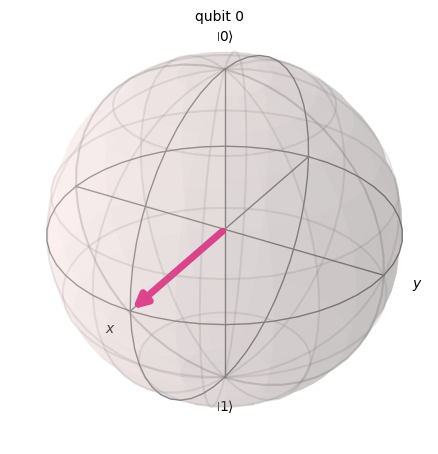

In [65]:
plot_bloch_multivector(state_pre)

In [66]:
#Medición en base Hadamard (cambia base de medición)
qc_hadamard = qc.copy()
qc_hadamard.h(0)
qc_hadamard.measure_all()

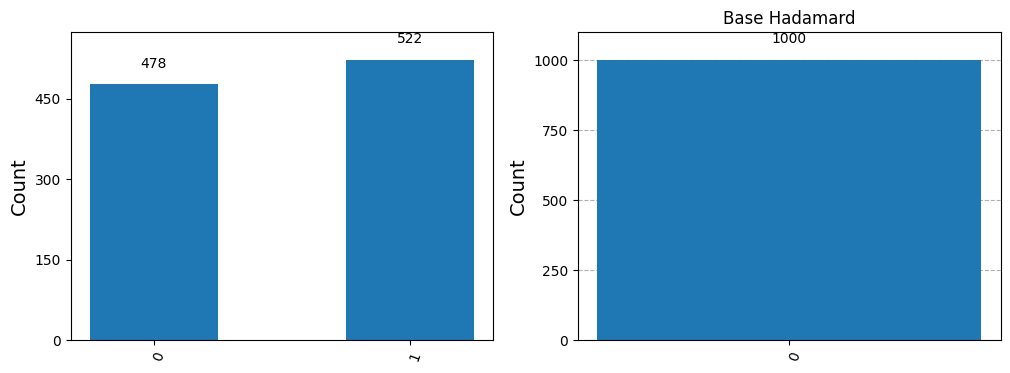

In [67]:
# Transpilacion
qc_comp = transpile(qc_comp, simulator)
qc_hadamard = transpile(qc_hadamard, simulator)

# Ejecución de mediciones en cada base
result_comp = simulator.run(qc_comp, shots=1000).result()
result_hadamard = simulator.run(qc_hadamard, shots=1000).result()

counts_comp = result_comp.get_counts()
counts_hadamard = result_hadamard.get_counts()

# resultados
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_histogram(counts_comp, ax=axs[0], title="Base computacional")
plot_histogram(counts_hadamard, ax=axs[1], title="Base Hadamard")
plt.show()

In [68]:
display(Markdown("### Estado despues de la medicion"))
display(Markdown(f'probabilidad: base Hadamard = {counts_hadamard["0"]/1000}'))
display(Markdown('probabilidad: base computacional:'))
display(Markdown(f'00: {counts_comp["0"] / 1000}'))
display(Markdown(f'11: {counts_comp["1"] / 1000}'))


### Estado despues de la medicion

probabilidad: base Hadamard = 1.0

probabilidad: base computacional:

00: 0.478

11: 0.522

Para ealizar mediciones de un sistema en una base **ortonormal arbitraria** $\{ |v_x\rangle \}^{2^n-1}_{x = 0}$, se pueden usar **mediciones estadandar** se pueden usar mediciones estandar si antes se aplica una transformacion unitaria  $\{ |v_x\rangle \} \to \{ |x\rangle \}$, estas tranformaciones se definen como:

$$
U_{v_x \to x} = \sum_{x=0}^{2^n - 1} |x\rangle \langle v_x|
$$

Después de la medición, se puede aplicar su inversa pues no afecta el resultado de la medicion, sino que solo **recupera el estado en su forma coherente**  con $ |v_x\rangle $  :

$$
U_{x \to v_x} = U_{v_x \to x}^\dagger = \sum_{x=0}^{2^n - 1} |v_x\rangle \langle x|
$$

Aunque la medición estándar es separable entre qubits, estas transformaciones unitarias **no siempre lo son**, especialmente si los vectores $|v_x\rangle$ están entrelazados. En tal caso, se requieren compuertas que actúan sobre varios qubits.

Por ejemplo, si:

$$
|v_0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle), \quad |v_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

entonces $U_{v_x \to x}$ sería la matriz de Hadamard, porque transforma esa base ortonormal en la base estándar:

$$
H|v_0\rangle = |0\rangle, \quad H|v_1\rangle = |1\rangle
$$


Esto teoricamente funciona Porque medir en una base arbitraria es equivalente  cambiar la base a la computacional y  medir normalmente es decir con mediciones estandar, aunque opcionalmente se puede volver a la base original.




Esto se puede representar en un **circuito cuántico**  como se ve en la figura:

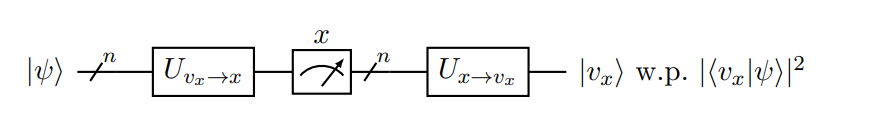

Esta figura muestra cómo implementar una medicion en una base ortonormal arbitraria $\{ |v_x\rangle \}_{x=0}^{2^n - 1}$ mediante una **medición estándar** en la base computacional, precedida y seguida por **transformaciones unitarias**. En este esquema, el bloque de medición representa una medición estándar.


Ahora para ampliar, dado un estado de entrada $|\psi\rangle$, aplicando la transformacion unitaria  $U_{v_x \to x}$ la probabilidad de odservar el resultado x se calcula usando la regla de Born:

$$
|\langle x| U_{v_x \to x} |\psi\rangle |^2 = |(U_{x \to v_x}|x\rangle)^\dagger |\psi\rangle|^2 =  |\langle v_z|\psi\rangle|^2
$$

es decir, la probabilidad se obtendría al medir directamente en la base $\{ |v_x\rangle \}$.

Además, tras obtener el resultado $x$, si se aplica la transformación unitaria inversa $U_{x \to v_x}$, el estado final será:

$$
U_{x \to v_x} |x\rangle = |v_x\rangle
$$

por  ejemplo, medir un qubit en la base diagonal $\{ |+\rangle, |-\rangle \}$ requiere una transformación que lleve esa base a la computacional. Esto puede lograrse con la **transformada de Hadamard** $H$, que satisface:

$$
H |+\rangle = |0\rangle, \quad H |-\rangle = |1\rangle
$$

También puede usarse la rotación de Pauli-Y $R_Y(\pi/2)$, que implementa:

$$
R_Y(\tfrac{\pi}{2}) |-\rangle = |0\rangle, \quad R_Y(\tfrac{\pi}{2}) |+\rangle = |1\rangle
$$

Como segundo ejemplo:


La medición de dos qubits en la **base de Bell** puede implementarse mediante un cambio de base a la base computacional usando una transformación unitaria $U_{\text{Bell} \to \text{Comp}}$. Esta se realiza con un circuito que aplica una compuerta **CNOT** seguida de una **Hadamard** al primer qubit. El mapeo es:

$$
\begin{aligned}
U_{\text{Bell} \to \text{Comp}}|\Phi^+\rangle &= |00\rangle, \\
U_{\text{Bell} \to \text{Comp}}|\Psi^+\rangle &= |01\rangle, \\
U_{\text{Bell} \to \text{Comp}}|\Phi^-\rangle &= |10\rangle, \\
U_{\text{Bell} \to \text{Comp}}|\Psi^-\rangle &= |11\rangle.
\end{aligned}
$$

La inversa $U_{\text{Comp} \to \text{Bell}} = U_{\text{Bell} \to \text{Comp}}^\dagger$ se implementa invirtiendo el mismo circuito.

La **complejidad** de implementar mediciones en una base arbitraria depende de si la transformación unitaria $U_{v_x \to x}$ puede expresarse con compuertas locales.

* Si los vectores $|v_x\rangle$ son **separables**, el cambio de base requiere sólo compuertas de un qubit.
* Si están **entrelazados**, se necesitan compuertas de múltiples qubits.




###Estado antes de la medicion

Vector de estado:
```
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
```

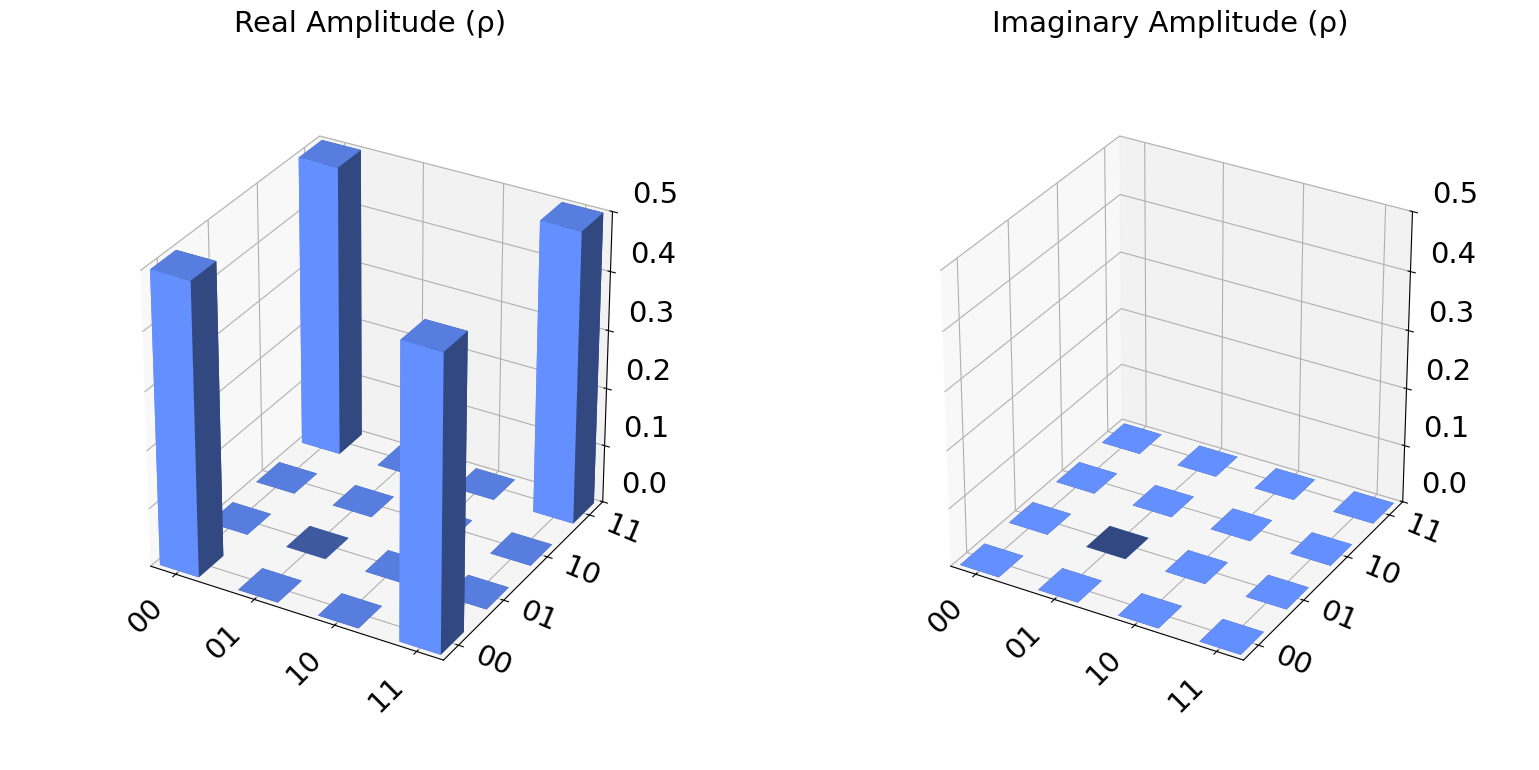

In [69]:
#continuando con el ejemplo de 2 qubits:

#el estado de bell se odtiene aplicando H y cNOt a dos qubits en |00> estado |Φ⁺⟩
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)
qc_bell.cx(0,1)


state_pre_bell = Statevector.from_instruction(qc_bell)
display(Markdown("###Estado antes de la medicion"))
display(Markdown(f"Vector de estado:\n```\n{state_pre_bell}\n```"))

state_pre_bell.draw('city')

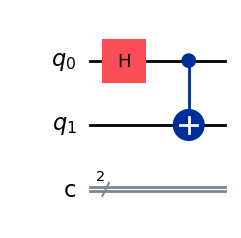

In [70]:
qc_bell.draw('mpl')    #matriz Ux -> v_x  esto es para la base de bell

In [71]:
#Medicion en base computacional
qc_comp = qc.copy()
qc_comp.measure_all()

In [72]:
# Guardamos el circuito para medición en base computacional
qc_comp = qc_bell.copy()
qc_comp.measure([0, 1], [0, 1])

# Para medir en base de Bell: aplicar cambio de base inverso antes de medir para la base de bell cruda
qc_bell_basis = qc_bell.copy()
qc_bell_basis.cx(0, 1)
qc_bell_basis.h(0)
qc_bell_basis.measure([0, 1], [0, 1])

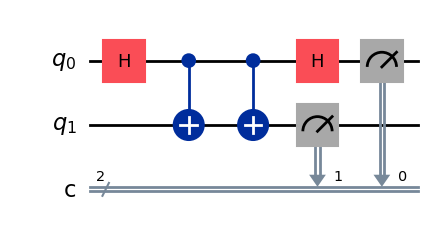

In [73]:
qc_bell_basis.draw('mpl') #matriz  U^-1 x->vx  = Uvx -> x  medidion en la base de bell

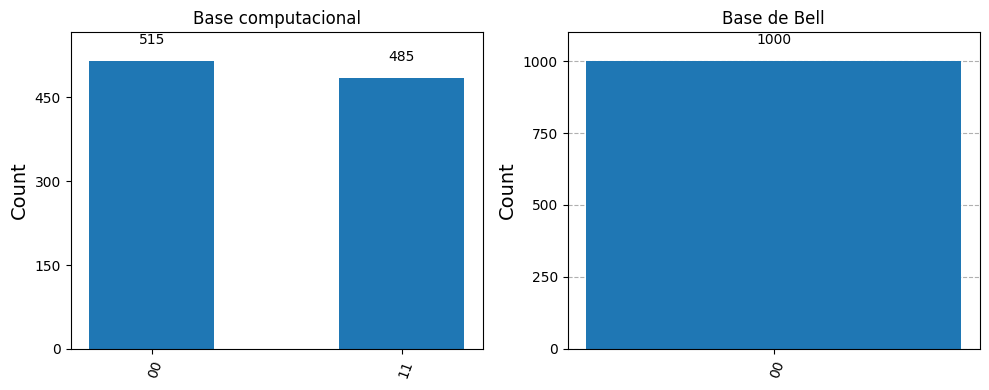

In [74]:
# Ejecutar simulaciones
result_comp = simulator.run(qc_comp, shots=1000).result()        #medicion en la base  00 y 11
result_bell = simulator.run(qc_bell_basis, shots=1000).result()  #medidion directa en la base de bell

# Resultados
counts_comp = result_comp.get_counts()
counts_bell = result_bell.get_counts()

# Visualizar
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_histogram(counts_comp, ax=axs[0])
axs[0].set_title("Base computacional")
plot_histogram(counts_bell, ax=axs[1])
axs[1].set_title("Base de Bell")
plt.tight_layout()
plt.show()

In [75]:
display(Markdown("### Estado despues de la medicion"))
display(Markdown(f'probabilidad: base bell = {counts_bell["00"]/1000}'))
display(Markdown(f'probabilidad: base computacional 00 = {counts_comp["00"]/1000}'))
display(Markdown(f'probabilidad: base computacional 11 = {counts_comp["11"]/1000}'))

#viendo el codigo y en base a la teroria anterior la probabilidad cae en 00, pero las matematicas dicen que deberia ser |Φ+⟩
#bueno segun el ultimo ejemplo este estado  corresponde a 00 segun Ubell -> comp, lo cual concuerda con las matematicas

### Estado despues de la medicion

probabilidad: base bell = 1.0

probabilidad: base computacional 00 = 0.515

probabilidad: base computacional 11 = 0.485

Para ampliar el estado inicial: $|\Phi^+\rangle$

es uno de los **cuatro estados de Bell** y se escribe como:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)
$$

en el ejemplo anterior aplicamos el circuito que transforma de la **base de Bell a la base computacional** eh hicimos en primera instancia este circuito:

* **Primero:** una compuerta **CNOT**
* **Después:** una compuerta **Hadamard H** en el primer qubit

Veamos qué hace CNOT:

* $\text{CNOT}|00\rangle = |00\rangle$
* $\text{CNOT}|11\rangle = |10\rangle$ (el segundo qubit cambia porque el primero es 1)

Entonces en estado queda:

$$
\text{CNOT}|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle)
$$


La compuerta **Hadamard** actúa sobre 1 qubit así:

$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle), \quad H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

Aplicamos $H \otimes I$ al estado resultante (sólo el **primer qubit** cambia):

$$
\frac{1}{\sqrt{2}} \left( |00\rangle + |10\rangle \right) = \frac{1}{\sqrt{2}} \left( |0\rangle \otimes |0\rangle + |1\rangle \otimes |0\rangle \right)
$$

Ahora aplicamos Hadamard al **primer qubit**:

$$
\begin{aligned}
H|0\rangle &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
H|1\rangle &= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
\end{aligned}
$$

Entonces:

$$
\begin{aligned}
&\frac{1}{\sqrt{2}} \left( H|0\rangle \otimes |0\rangle + H|1\rangle \otimes |0\rangle \right) = \\
&\frac{1}{\sqrt{2}} \left( \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle + \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes |0\rangle \right) \\
&= \frac{1}{2} \left[ (|0\rangle + |1\rangle + |0\rangle - |1\rangle) \otimes |0\rangle \right] \\
&= \frac{1}{2} (2|0\rangle) \otimes |0\rangle = |00\rangle
\end{aligned}
$$

el resultado es:

$$
|\Phi^+\rangle \xrightarrow{\text{CNOT + H}} |00\rangle
$$

Así que efectivamente:

$$
U_{\text{Bell} \to \text{Comp}} |\Phi^+\rangle = |00\rangle
$$

##ejercicio:
probar los otros estados de bell al ser medidos:

$$
\begin{aligned}
U_{\text{Bell} \to \text{Comp}}|\Psi^+\rangle &= |01\rangle, \\
U_{\text{Bell} \to \text{Comp}}|\Phi^-\rangle &= |10\rangle, \\
U_{\text{Bell} \to \text{Comp}}|\Psi^-\rangle &= |11\rangle.
\end{aligned}
$$


### La norma del producto punto de dos vectores:
---
El valor absoluto al cuadrado del producto interno entre dos vectores  $|w\rangle$ y $|\psi\rangle$ de dimensión $2^n$ ¿, es decir,$|\langle w|\psi\rangle |^2$ se denomina la **fidelidad** entre dos estados cuánticos $|\psi\rangle$ y $|\mathbf{w}\rangle$, es decir, $|\langle \mathbf{w}|\psi \rangle|^2$, se puede medir $|\psi\rangle$ en una base ortonormal que incluya a $|\mathbf{w}\rangle$. Aplicando una unitaria $U_w$ tal que $U_w|\mathbf{w}\rangle = |0\rangle$, se transforma el problema en medir la probabilidad de obtener el resultado 0 al medir $U_w|\psi\rangle$. Esa probabilidad corresponde exactamente a $|\langle \mathbf{w}|\psi \rangle|^2$.

Esta idea permite construir una **neurona cuántica estocástica**, donde $|\mathbf{w}\rangle$ actúa como vector de pesos y la salida es “activa” si la medición da 0. La probabilidad de activación es la fidelidad, $|\langle \mathbf{w}|\psi \rangle|^2$, funcionando como una función de activación. Aunque el sistema trabaja sobre vectores de tamaño $2^n$ con solo $n$ qubits, preparar los estados puede requerir **recursos exponenciales**.

Claro. A continuación te doy una **descripción detallada** de la **neurona cuántica binaria estocástica**, dividiéndola en sus elementos fundamentales:



### ejemplo: Neurona Cuántica Binaria Estocástica

Una **neurona cuántica binaria estocástica** es una unidad cuántica de procesamiento que, dadas dos representaciones de estados cuánticos $|\psi\rangle$ (entrada) y $|\mathbf{w}\rangle$ (peso o patrón), **activa o no se activa** (da como salida 1 o 0) con una **probabilidad proporcional a la fidelidad cuántica** entre ambos estados.

para construir un  modelo dimple partimos de las ideas:

* Necesitamos una entrada (input)  es decir un estado **cuantico** \$|\psi\rangle\$.

* un vector de **pesos**   \$|w\rangle\$ (también estado cuántico) con el cual comparar la fidelidad.

* Calcular  la **fidelidad** entre \$|\psi\rangle\$ y \$|w\rangle\$, es decir:

  $$
  \boxed{\text{Output activo con probabilidad } |\langle w | \psi \rangle|^2}
  $$

Esto es **análogamente** una neurona con función de activación:

$$
\boxed{f(|\psi\rangle) = |\langle w | \psi \rangle|^2}
$$

Y el resultado final es **estocástico** (se mide 0 o 1 con cierta probabilidad).

---

Vamos a representar los estados:

Dado que estamos usando **1 qubit**, los vectores $|\psi\rangle$ y $|w\rangle\$ viven en un espacio de dimensión 2. Podemos representarlos como rotaciones sobre \$|0\rangle\$:

esto es lo mismo que ver la forma general de un qubit:

$$
|\psi\rangle = \alpha_0 |0\rangle + \alpha_1 |1\rangle
$$

se puede escribir en la esfera de bloch como

$$
|\psi\rangle = \cos(\theta_\psi)\,|0\rangle + \sin(\theta_\psi)\,|1\rangle
$$

descartando la fase global  $e^{i\theta}$, de igaual forma para el vector de peso:

$$
|w\rangle = \cos(\theta_w)\,|0\rangle + \sin(\theta_w)\,|1\rangle
$$

Ya tenemos los 2 elementeos importantes, un vector de estado $\psi\rangle$ y un vector de pesos  $|w\rangle$ ahora ¿Cómo estimar la fidelidad?

Queremos calcular:

$$
|\langle w | \psi \rangle|^2
$$

Pero **no podemos medir directamente en la base \$|w\rangle\$**, por la teoría enterior y ademas en Qiskit y en hardware cuántico sólo se mide en la base computacional \${|0\rangle, |1\rangle}\$.

Volviendo a lo aprendido debemos construir  una **Una compuerta unitaria** \$U\_w\$ que mapee:

$$
U_w |w\rangle = |0\rangle
$$

Entonces:

$$
|\phi\rangle = U_w |\psi\rangle
$$

La fidelidad se vuelve:

$$
|\langle w | \psi \rangle|^2 = |\langle 0 | \phi \rangle|^2 = P(0)
$$

O sea, **la probabilidad de medir \$|0\rangle\$** en el estado transformado.

Queremos una transformación \$U\_w\$ tal que:


$$
U_w |w\rangle = |0\rangle
$$

Recordemos que el peso es:

$$
|w\rangle = \cos(\theta_w)|0\rangle + \sin(\theta_w)|1\rangle
$$

Entonces teniendo en cuenta que que podemos cambiar los estados de la esfera de Bloch con rotaciones unitarias, podriamos probar con la compuerta  $RY(-2\theta_w)$ la cual como su nombre lo indica rota los vectores de estado a lo largo del eje y de tal forma que podamos:
$$
RY(-2\theta_w)|w\rangle = |0\rangle
$$

veamos:

$$
RY(\phi) =\begin{bmatrix}\cos(\phi/2) & -\sin(\phi/2) \\\sin(\phi/2) & \cos(\phi/2)
\end{bmatrix}
$$

Si aplicamos $RY(-2\theta_w)$, obtenemos:

$$
\begin{bmatrix}\cos(\theta_w) & \sin(\theta_w) \\ -sin(\theta_w) & \cos(\theta_w)\end{bmatrix}\begin{bmatrix}\cos(\theta_w) \\\sin(\theta_w)\end{bmatrix} = \begin{bmatrix} 1 \\0\end{bmatrix}= |0\rangle
$$

por lo que esta trasnformacion nos lleva a la base $|0\rangle$ lo cual nos permitira medir la fidelidad en la base computacional.

¿Por que se hace esto?

bueno queremos que **la neurona actúe como un clasificador**: dado un **estado de entrada** \$|\psi\rangle\$ y un **vector de peso** $|w\rangle$, la neurona debe **medir qué tan similares son**.

Esto se hace midiendo la **proyección ose la fidelidad** entre \$|\psi\rangle\$ y \$|w\rangle\$, que equivale a:

$$
\text{Fidelidad} = |\langle w | \psi \rangle|^2
$$

Eso nos da un número entre 0 y 1 que indica **qué tan alineados están** \$|\psi\rangle\$ y \$|w\rangle\$. La idea es que esta fidelidad actúe como **una probabilidad de activación**, análoga a la salida de una neurona clásica estocástica (como en una red neuronal binaria estocástica, SBN).

Ademas queremos convertir el vector de peso \$|w\rangle\$ en la base \$|0\rangle\$, para que la **proyección entre \$|\psi\rangle\$ y \$|w\rangle\$** se convierta en una **medición en la base computacional**.

En otras palabras  sencillos,  si \$|w\rangle\$ es un vector cualquiera, no podemos medir directamente qué tan "alineado" está \$|\psi\rangle\$ con \$|w\rangle\$. Pero si **rotamos todo el sistema** de modo que \$|w\rangle \mapsto |0\rangle\$, entonces medir en la base \${|0\rangle, |1\rangle}\$ nos dice qué tan alineado estaba \$|\psi\rangle\$ con \$|w\rangle\$.

---

## Preparacion:

Codificamos el input \$|\psi\rangle\$ como una **rotación** del estado base \$|0\rangle\$ usando una compuerta RY:

$$
|\psi\rangle = \cos(\theta_\psi)|0\rangle + \sin(\theta_\psi)|1\rangle = RY(2\theta_\psi)|0\rangle
$$
La compuerta RY rota el qubit sobre el eje Y del Bloch Sphere. Si aplicamos $RY(2\theta)$ sobre $|0\rangle = \begin{bmatrix} 1 \ 0 \end{bmatrix}$:

$$
RY(2\theta)|0\rangle =
\begin{bmatrix}
\cos(\theta) \\
\sin(\theta)
\end{bmatrix}
= |\psi\rangle
$$

Así obtenemos un estado con ángulo \$\theta\_\psi\$.

Ahora codificamos el **vector de pesos** también como un estado cuántico:

$$
|w\rangle = \cos(\theta_w)|0\rangle + \sin(\theta_w)|1\rangle
$$

Queremos evaluar la **fidelidad** \$|\langle w|\psi\rangle|^2\$. Pero no podemos medir directamente en la base \${|w\rangle, |w^\perp\rangle}\$. Por eso, **cambiamos de base**.Aplicamos una compuerta:

$$
U_w = RY(-2\theta_w)
$$

Esto hace que:

$$
U_w |w\rangle = RY(-2\theta_w) \cdot RY(2\theta_w)|0\rangle = |0\rangle
$$

Entonces, aplicamos esta misma transformación a $|\psi\rangle$, y la proyectamos luego sobre $|0\rangle$.Entonces el estado final antes de medir es:

$$
|\phi\rangle = RY(-2\theta_w) \cdot RY(2\theta_\psi)|0\rangle
$$

Esto equivale a aplicar dos rotaciones consecutivas:

$$
|\phi\rangle = RY(2(\theta_\psi - \theta_w))|0\rangle
$$

Esto se debe a una propiedad trigonométrica de la composición de rotaciones en el eje Y:

**$RY(a) \cdot RY(b) = RY(a + b)$**

Entonces:

$$
|\phi\rangle = \begin{bmatrix} cos(\theta_\psi - \theta_w) \\ sin(\theta_\psi - \theta_w)
\end{bmatrix}
$$

Medimos el qubit en la **base computacional**, y la probabilidad de obtener 0 (es decir, de proyectar sobre \$|0\rangle\$) es:

$$
P(0) = |\langle 0 | \phi\rangle|^2 = \cos^2(\theta_\psi - \theta_w)
$$

Esto representa la fidelidad entre \$|\psi\rangle\$ y \$|w\rangle\$









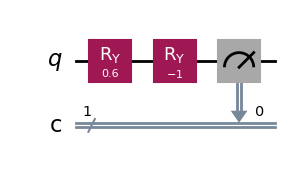

In [76]:
#implementacion
#definimos algunos valores para thetha_psi y thetha_w

theta_psi = 0.3     # estado de entrada
theta_w = 0.5       # vector de peso

qc_neuron = QuantumCircuit(1,1)

#el estado de entrada que codificara el estado  |ψ⟩ en la base de w
qc_neuron.ry(2 * theta_psi, 0)  # RY(2θ)|0> = cos(θ)|0> + sin(θ)|1>    # prepara |ψ⟩ = dato de entrada

#aplicar U_w para la medicion el base U_w, basicamente lleva el input a la coordenada los pesos thetha_w

qc_neuron.ry(-2 * theta_w, 0)                                          # aplica U_w = ajusta la base según el peso

#medir en la base computacional
qc_neuron.measure(0,0)

qc_neuron.draw('mpl')


**Resultado de la neurona cuántica:**

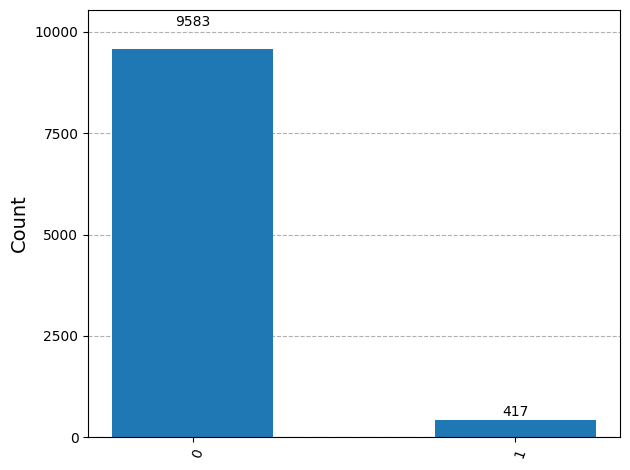

In [77]:
# Simulación
sim = AerSimulator()
job = sim.run(transpile(qc_neuron, sim), shots=10000)
counts = job.result().get_counts()

# Mostrar resultados
display(Markdown("**Resultado de la neurona cuántica:**"))
plot_histogram(counts)




In [78]:
# Activación: cuántas veces el resultado fue '0'
activation_prob = counts.get('0', 0) / 10000
display(Markdown(f"**Probabilidad de activación (fidelidad):** {activation_prob:.4f}"))

#en otros terminos los vectores descrito port los angulo de entrada that_psi y thetha_W estan bastante cerca

**Probabilidad de activación (fidelidad):** 0.9583

#Mediciones parciales

---

En un sistema de $n$ qubits, una **medición parcial** significa que medimos **solo uno de los qubits**, y dejamos los otros sin medir. Esto **colapsa parcialmente** el estado del sistema es decir el qubit medido se colapsa, pero los demás no.

La descomposición del estado  a cualquier estado de $n$ qubits puede escribirse así:

$$
|\psi\rangle_n = \alpha_0 |0\rangle \otimes |\phi_0\rangle_{n-1} + \alpha_1 |1\rangle \otimes |\phi_1\rangle_{n-1}
$$

En Donde $|\phi_0\rangle_{n-1}$ y $|\phi_1\rangle_{n-1}$ son **vectores de estado de los $n-1$ qubits** y ademas $\alpha_0$ y $\alpha_1$ son amplitudes complejas tales que $|\alpha_0|^2 + |\alpha_1|^2 = 1$.

Lo cual quiere decir que hemos "separado" el estado según lo que está haciendo el **primer qubit**: si está en $|0\rangle$, el resto está en $|\phi_0\rangle$, y si está en $|1\rangle$, el resto está en $|\phi_1\rangle$.

Por ejemplo dado un estado de 3 qubits:

$$
|\psi\rangle_3 = \frac{i}{2}|000\rangle + \frac{12+5i}{26}|001\rangle - \frac{1}{2}|101\rangle + \frac{3}{10}|110\rangle - \frac{2i}{5}|111\rangle
$$

Este se reescribe agrupando según el **primer qubit**:

$$
|\psi\rangle_3 = |0\rangle \otimes |\phi_0\rangle + |1\rangle \otimes |\phi_1\rangle
$$

Entonces:

$$
|\psi\rangle_3 = |0\rangle (\frac{i}{2} |00\rangle + \frac{12+5i}{2}|01\rangle) + |1\rangle (\frac{1}{2} + \frac{3}{10} - \frac{2i}{5} |11\rangle )
$$

donde:

$$
|\phi_0\rangle = \frac{i}{\sqrt{2}} |00\rangle + \frac{12+5i}{\sqrt{2}\cdot 26}|01\rangle \quad
|\phi_1\rangle = \frac{1}{\sqrt{2}}|01\rangle + \frac{3}{10\sqrt{2}}|10\rangle - \frac{2i}{5\sqrt{2}}|11\rangle
$$

Lo que ocurre al medir el qubit 1  según la **regla generalizada de Born**, la probabilidad de obtener $x = 0$ o $x = 1$ es:

$$
\Pr[x] = |\alpha_x|^2
$$

En el ejemplo, $|\alpha_0|^2 = \frac{1}{2}$ y $|\alpha_1|^2 = \frac{1}{2}$. O sea, hay 50% de probabilidad de medir 0 o 1.

**Colapso parcial del estado**

* Si el resultado es **0**, el nuevo estado post-medición es:

$$
|0\rangle \otimes |\phi_0\rangle
$$

* Si es **1**, entonces:

$$
|1\rangle \otimes |\phi_1\rangle
$$

Esto significa que **el primer qubit colapsó** a $|x\rangle$, y el resto del sistema quedó en $|\phi_x\rangle$. El colapso es **parcial** porque solo medimos un qubit.

Podriamos preguntarnos si El estado queda entrelazado o no y la respuesta es Sí y no:

* El primer qubit **ya no está entrelazado** con los otros: está colapsado.

* Pero los otros $n - 1$ qubits **sí pueden seguir entrelazados** entre ellos (dentro de $|\phi_x\rangle$).

El caso especial sin entrelazamiento original,  resulta que:

$$
|\phi_0\rangle = |\phi_1\rangle = |\phi\rangle
$$

Entonces el estado original era **separable**:

$$
|\psi\rangle = (\alpha_0 |0\rangle + \alpha_1 |1\rangle) \otimes |\phi\rangle
$$

En ese caso, no había entrelazamiento entre el primer qubit y los demás.




#Ejemplo:


Supongamos el siguiente estado:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle
$$

Este es un sistema de 2 qubits:

* El **primer qubit** es el que vamos a medir.
* El **segundo qubit** queda sin medir o puede quedar entrelazado.



Queremos escribir el estado de la siguiente forma:

$$
|\psi\rangle = \alpha_0|0\rangle|\phi_0\rangle + \alpha_1|1\rangle|\phi_1\rangle
$$

Buscamos los términos que empiezan con $|0\rangle$:

$$\frac{1}{\sqrt{2}}|00\rangle = \frac{1}{\sqrt{2}}|0\rangle|0\rangle$$



Buscamos los términos que empiezan con |1⟩:

* $\frac{1}{2}|10\rangle = \frac{1}{2}|1\rangle|0\rangle$
* $\frac{1}{2}|11\rangle = \frac{1}{2}|1\rangle|1\rangle$

Agrupamos:

$$
|1\rangle \left( \frac{1}{2}|0\rangle + \frac{1}{2}|1\rangle \right)
$$

Entonces:

 $$\alpha_1 = \sqrt{\left(\frac{1}{2}\right)^2 + \left(\frac{1}{2}\right)^2} = \sqrt{\frac{1}{4} + \frac{1}{4}} = \sqrt{\frac{1}{2}} = \frac{1}{\sqrt{2}}$$
$$|\phi_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$



Estado total reescrito:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\left( \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \right)
$$

Calculamos las probilidades de medir 0 o 1


$$
P(0) = |\alpha_0|^2 = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2}
$$

$$
P(1) = |\alpha_1|^2 = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2}
$$

El estado posterior se puede dividir en 2 cosas

**Caso 1**: Se obtiene 0

El estado colapsa a:

$$
|\psi'\rangle = |0\rangle |\phi_0\rangle = |0\rangle|0\rangle
$$

Todo el sistema colapsó a un estado clásico.



**Caso 2:** Se obtiene 1

El estado colapsa a:

$$
|\psi'\rangle = |1\rangle |\phi_1\rangle = |1\rangle \cdot \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

Este es:

$$
|\psi'\rangle = \frac{1}{\sqrt{2}}|10\rangle + \frac{1}{\sqrt{2}}|11\rangle
$$

Por lo que el primer qubit ya no está entrelazado ya  que es $|1\rangle$,pero el segundo qubit sigue en superposición.



Hemos visto que  cualquier estado $|\psi\rangle$ de $n$ qubits puede escribirse así:

$$
|\psi\rangle = \alpha_0 |0\rangle |\phi_0\rangle_{n-1} + \alpha_1 |1\rangle |\phi_1\rangle_{n-1}
$$

Donde:

* $|\phi_0\rangle_{n-1}$, $|\phi_1\rangle_{n-1}$ son los estados del resto de qubits,
* $\alpha_0, \alpha_1$ son las amplitudes asociadas al primer qubit.


En este orden e ideas podemos formalizar las mediciones parciales de un solo Qubit:

**Paso 1:** Calcular los estados no normalizados del resto del sistema:

$$
|\tilde{\phi}_x\rangle = (\langle x| \otimes I) |\psi\rangle
$$

**Paso 2:** Calcular la amplitud:

$$
\alpha_x = \| |\tilde{\phi}_x\rangle \|
$$

**Paso 3:** **Normalizar**:

$$
|\phi_x\rangle = \frac{1}{\alpha_x} |\tilde{\phi}_x\rangle
$$



con estas definiciones, una medidion parcial en la base computacional  para el primer Qubit en el estado $|\psi\rangle$ se describe como:

* **Regla de Born generalizada** :

La  **probabilidad** de obtener el resultado $x \in \{0,1\}$ al medir el primer qubit es:

$$
\Pr[x] = (\langle x| \otimes I) |\psi\rangle_n \langle \psi|_n (|x\rangle \otimes I)
$$


*  **Colapso parcial del estado:**

Después de la medición, el sistema colapsa al estado $|x\rangle|\phi_x\rangle_{n-1}$

$$
|\phi_x\rangle_{n-1} = \frac{(\langle x| \otimes I)|\psi\rangle_n}{\sqrt{(\langle x| \otimes I) |\psi\rangle_n \langle \psi|_n (|x\rangle \otimes I)}}
$$

Solo se colapsa el qubit medido; los demás quedan en el estado $|\phi_x\rangle$, que **puede seguir siendo entrelazado internamente**.



# EJEMPLO:
---

Usamos el estado:

$$
|\psi\rangle = \frac{1}{\sqrt{3}}|00\rangle + \frac{1}{\sqrt{3}}|01\rangle + \frac{1}{\sqrt{3}}|10\rangle
$$

el vector $|\psi\rangle$ es:

$$
|\psi\rangle = \frac{1}{\sqrt{3}} \begin{bmatrix}
1 \\ 1 \\ 1 \\ 0
\end{bmatrix}
$$


Queremos aplicar:

$$
\Pr[x] = (\langle x| \otimes I) |\psi\rangle_n \langle \psi|_n (|x\rangle \otimes I)
$$

Medimos el primer qubit en la base $|0\rangle, |1\rangle$


**Para $x = 0$**


Aplicamos la fórmula de Born:

$$
\Pr[x] = (\langle x| \otimes I) |\psi\rangle_n \langle \psi|_n (|x\rangle \otimes I)
 $$


Multiplicamos:

$$
Pr[0] = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0  & 0 \end{bmatrix} \frac{1}{3} \begin{bmatrix} 1 \\ 1\\ 1\\ 0\end{bmatrix}  \begin{bmatrix} 1 & 1 & 1 & 0\end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & 0 \\0 & 1 \\ 0 & 0 \end{bmatrix} = \frac{1}{3} \begin{bmatrix} 1 & 1 \end{bmatrix}\begin{bmatrix} 1 \\ 1 \end{bmatrix}  = \frac{2}{3}
$$

Estado del colapsado parcial

$$
|\phi_0\rangle = \frac{(\langle 0| \otimes I)|\psi\rangle}{\sqrt{\Pr[0]}} = \frac{1}{\sqrt{\frac{2}{3}}} \cdot \frac{1}{\sqrt{3}} \begin{bmatrix} 1 &  0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ 1 \\ 0\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$
de la descompocision parcial:

$$
|\psi'\rangle=|0\rangle|\phi\rangle =  \frac{1}{\sqrt{2}} (|00\rangle + |01\rangle)
$$

**Para** $x = 1$

Operamos:

$$
Pr[1] = \begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0  & 1 \end{bmatrix} \frac{1}{3} \begin{bmatrix} 1 \\ 1\\ 1\\ 0\end{bmatrix}  \begin{bmatrix} 1 & 1 & 1 & 0\end{bmatrix} \begin{bmatrix} 0 & 0 \\ 1 & 0 \\0 & 0 \\ 0 & 1 \end{bmatrix} = \frac{1}{3}  \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{2}{3}
$$

El estado posterior seria:

$$
|\phi_1\rangle = \frac{1}{\sqrt{\frac{1}{3}}} \cdot \frac{1}{\sqrt{3}} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
= 1 \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle
$$


#EXTENCION DE LA DEFINICION DE UNA MEDICION PARCIAL

---

En base a lo anterior podemos extender el formalismo de una  **medicion parcial** en un sistema de n Qubits  donde se puede medir cualquier subconjunto de $n'\leq n$ qubits, usando cualquier base ortonormal, sin pérdida de generalidad. Entonces si tenemos un estado de entrada $|\psi\rangle$   **la regla de Born**  y el colapso parcial se pueden extender direcatemnte de la siguiente forma:

* **Regla de Born generalizada**:
La probabilidad de obtener el resultado x (una cadena binaria de longitud $n_0$ ) al medir los primeros $n_0$ qubits del sistema
$|\psi\rangle$:

$$
Pr[x] = (\langle v_x|_{n'} \otimes I)|\psi\rangle_n \langle \psi | _n ( | v_x \rangle_{n'} \otimes I)
$$

* **Colapso parcial del estado**:
Si al medir los $n_0$  primeros qubits se obtiene el resultado de x, el estado colapsado del sistema será $|v_x\rangle_n'|\phi_x \rangle_{n-n'}$ con:

$$
|\phi_x\rangle _{n-n'} = \frac{(\langle v_x|_{n'} \otimes I )|\psi\rangle_n }{\sqrt{Pr[x]}}
$$

#Mediciones parciales selectivas y decoherencia.

---

Una medición no selectiva ocurre cuando se mide un subsistema cuántico (como A) y se descarta el resultado, lo que introduce incertidumbre clásica en el sistema. Al no conservarse el resultado, no se conoce con certeza el estado posterior a la medición, lo que afecta la evolución del subsistema restante (B). El objetivo es describir cómo queda y cómo evoluciona dicho subsistema tras esta intervención.


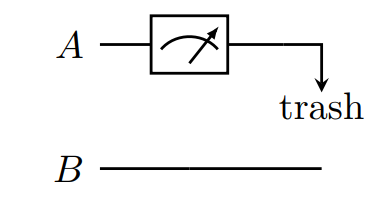


Como vimos en la figura anterior, si realizamos una medicion de tal forma que solo medimos un Qubit  y se "desecha" el resultado del otro, entonces el estado del subsistema resultante $B$  compuesto por los qubits faltantes, no se puede escribir como un unico vector estado por lo que el estado queda en una unica mexcla estaditica, que se denomina **ensamble estaditico**     y llamamos a esta medicion una **medición parcial no selectiva**, descrita por el conjunto

$$
\left\{ (|\phi_0\rangle_{n-1}, |\alpha_0|^2),\ (|\phi_1\rangle_{n-1}, |\alpha_1|^2) \right\}.
$$

Lo cual indica que el sistema $B$ se encuentra en el estado  $|\psi_0\rangle_{n-1}$ con probabilidad $|\alpha_0|^2$ o en el estado $|\psi_1\rangle_{n-1}$ con probabilidad $|\alpha_1|^2$, lo cual representa una probabilidad clasica o **incertidumbre epistemica** distinta a una probabilidad del tipo:


$$
\alpha_0 |\phi_0\rangle_{n-1} + \alpha_1 |\phi_1\rangle_{n-1},
$$

Lo cual deriva de una falta de conocimiento  efectivo sobre cuál de esos dos estados describe  al sistema, y esta mezacla surge solo si el sistema estaba **entrelazado**  con el qubit medido  . Si no hay entrelazamiento entre el qubit medido y los $n - 1$ qubits restantes, entonces la medición no afecta al estado de $B$, el cual permanece en un estado puro $|\phi\rangle_{n-1}$, como se describe en la ecuación .

Dado que la formulación basada en kets no es suficiente para describir esta mezcla de estados, se hace necesario introducir el formalismo de **matrices densidad**, que permite representar de forma adecuada estos estados mixtos.

Ahora unn estado ket como  $|\psi\rangle  = \alpha_0|0\rangle$ se denemina coherente, mientres que un ensamble estadistico $\{|\phi_0\rangle, ||\alpha_0||^2 \}$ generado por un estado coherente, se denomina decoherente  y se caracteriza por aletoriedad clasica con respecto al ket que describe el sistema.

Las mediciones no-selectivas, y por tanto la decoherencia, pueden ser añadidas intencionalmente en un circuito cuántico como recurso para implementar computación probabilística. La decoherencia también ocurre de forma natural en un sistema cuántico abierto, en el que un subsistema, esta es una situación típica en las computadoras cuánticas, cuyos qubits inevitablemente se entrelazan con el entorno después de algún (corto) periodo de tiempo, podemos decir que el entorno actua como un odservador cuyas mediciones no estan dionibles para el sistema B.


#Traza parcial

---


Para conectar el estado final con el estado previo a la medición, se introduce la **traza parcial**, que generaliza la operación de **traza** usual. Recordando que la traza de una matriz $A$ se puede expresar como una suma sobre su base ortonormal:

$$
\text{tr}(\rho) = \sum_{x=0}^{2^n - 1} \langle v_x | \rho | v_x \rangle,
$$

y que, para productos externos de vectores, cumple:

$$
\text{tr}(|v\rangle \langle u|) = \langle v | u \rangle.
$$

Estas propiedades permiten expresar cualquier matriz $A$ como combinación lineal de productos externos en una base ortonormal $\{ |x\rangle \}$:

$$
A = \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} [A]_{(x,y)} |x\rangle \langle y|
$$

Así,  la traza parcial a partir de un estado global $\rho$, permite obtener el estado reducido de un subsistema al eliminar las variables del otro subsistema.

Además, la misma descomposición —con coeficientes generalmente diferentes, digamos $[A']_{(x,y)}$ aplica para cualquier base ortonormal,  es decir.

$$
A = \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} [A']_{(x,y)} |v_x\rangle \langle v_y|
$$

entonces podemos definir la traza parcial:

$$
tr(|v\rangle \langle u_x|) = \langle v_x | u_x \rangle  
$$

es decir la traza parcial convierte un roducto externo en uno interno.
tambien podemos
$$
\text{tr}(\rho) = \sum_{x=0}^{2^n - 1} \langle v_x | \rho | v_x \rangle
$$

para cualquier **base ortonormal** $\{ |v_x\rangle \}_{x=0}^{2^n - 1}$. De hecho.




Para ejemplificar, supongamos un sistema de $n$ cúbits en un estado puro general.Este estado puede escribirse como:

$$
|\psi\rangle_{AB} = \sum_{x=0}^{2^{n_0} - 1} \alpha_x |v_x\rangle_A |\phi_x\rangle_B \tag{1}
$$

Una **medición no selectiva** significa que medimos A pero **sin registrar el resultado**. La matriz de densidad resultante para B es:

$$
\rho_B = \sum_{x=0}^{2^{n_0} - 1} |\alpha_x|^2 |\phi_x\rangle \langle \phi_x| \tag{2}
$$

La **traza parcial sobre A** de la matriz de densidad total $\rho_{AB} = |\psi\rangle_{AB} \langle \psi|$ seria:

$$
\rho_B = \mathrm{tr}_A(\rho_{AB}) = \sum_{x=0}^{2^{n_0} - 1} (\langle v_x|_A \otimes I_B)\, \rho_{AB}\, (|v_x\rangle_A \otimes I_B) \tag{3}
$$

y luego expresamos $\rho_{AB} = |\psi\rangle_{AB} \langle \psi|$ usando (1):

   $$
   \rho_{AB} = \sum_{x, x'} \alpha_x \alpha_{x'}^* |v_x\rangle_A |\phi_x\rangle_B \langle v_{x'}|_A \langle \phi_{x'}|_B
   $$

Aplicamos la traza parcial sobre A usando una base ortonormal $\{ |v_x\rangle \}$, y se eliminan los términos cruzados (con $x \ne x'$):

   $$
   \rho_B = \sum_x |\alpha_x|^2 |\phi_x\rangle_B \langle \phi_x|_B
   $$

Lo cual **coincide exactamente con (2)**, el resultado de una medición no selectiva en A.




### Traza Parcial como Operador Lineal

La **traza parcial** es una generalización de la traza total, aplicada sobre un subconjunto de un sistema cuántico compuesto.cualquier matriz densidad $\rho_{AB}$ puede descomponerse como:

$$
\rho_{AB} = \sum_{i,j,k,l} c_{ijkl} \left( |v_i\rangle_A \langle v_j|_A \otimes |u_k\rangle_B \langle u_l|_B \right)
\tag{1}
$$

Donde $|v_i\rangle_A, |u_k\rangle_B$ son bases de los subsistemas $A$ y $B$.


Sea $\rho_{AB} = |v,u\rangle \langle v',u'|$, con:

$$
|v,u\rangle_{AB} = |v\rangle_A \otimes |u\rangle_B
$$

Entonces, la **traza parcial sobre el subsistema $A$** es:

$$
\operatorname{tr}_A \left( |v\rangle_A \langle v'|_A \otimes |u\rangle_B \langle u'|_B \right)
= \langle v'|v\rangle \cdot |u\rangle_B \langle u'|_B
\tag{2}
$$

lo cual  convierte el producto externo en un producto interno unicamente **sobre el subsistema que se elimina**.

---

### Traza parcial equivalente a marginalización Clásica

La traza parcial es el análogo cuántico de **marginalizar** una variable en probabilidad clásica.

#### Ejemplo:

Supongamos sistema de **2 cbits** con distribución conjunta:

$$
\vec{p} = \begin{bmatrix}
p_{00} \\ p_{01} \\ p_{10} \\ p_{11}
\end{bmatrix}
$$

Representado como matriz densidad:

$$
\rho_{AB} =
\begin{bmatrix}
p_{00} & 0 & 0 & 0 \\
0 & p_{01} & 0 & 0 \\
0 & 0 & p_{10} & 0 \\
0 & 0 & 0 & p_{11}
\end{bmatrix}
=
\sum_{i,j} p_{ij} |ij\rangle \langle ij|
\tag{3}
$$

Aplicando traza parcial sobre el qubit $A$ (primer bit):

$$
\rho_B = \operatorname{tr}_A(\rho_{AB}) =
(p_{00} + p_{10}) |0\rangle \langle 0| + (p_{01} + p_{11}) |1\rangle \langle 1|
\tag{4}
$$

$$
\rho_B =
\begin{bmatrix}
p_{00} + p_{10} & 0 \\
0 & p_{01} + p_{11}
\end{bmatrix}
$$


